# Homophily and Transitivity in Dynamic Network Formation Jupyter Notebook
_Bryan Graham - University of California - Berkeley_  

March 2016

#### Code citation:
<br>
Graham, Bryan S. (2016). "Homophily and Transitivity in Dynamic Network Formation Python Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://eml.berkeley.edu//~bgraham/ (Accessed 18 March 2016)
<br>
#### Paper citation:
<br>
Graham, Bryan S. (2016). "Homophily and Transitivity in Dynamic Network Formation," _CEMMAP Working Paper CWPXX/16_.
<br>
<br>

## Overview
This Python/Jupyter Notebook provides code to reproduce all figures and Monte Carlo results in the paper "Homophily and transitivity in dynamic network formation." The program output reported below was generated by executing the notebook using the Anaconda distribution of Python 2.7.11 on a MacBook Air (2011, model, 1.8 GHz Intel Core i7, 4GB memory) running OS X (version 10.11.3). This code is provided "as is", without warranty, explicit or otherwise. Please feel free to use the code for research purposes (with attribution). Citation information is provided above.
<br>
<br>
I begin by importing the main Python packages used below. Of these the Numpy, Scipy, and NetworkX packages are most central. The latter module provides excellent functionality for the creation and manipulation of graph structures. Users should adjust the working directory variable below to an appropriate location on their computer. Copies of all figures rendered below are saved as .png files in the working directory.

In [2]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Load libraries
import time
import numpy as np
import scipy.sparse as sp
import pandas as pd
import statsmodels.api as sm
import networkx as nx
import pylab as plt
import math

In [3]:
# Division of two integers in Python 2.7 does not return a floating point result. The default is to round down 
# to the nearest integer. The following piece of code changes the default.
from __future__ import division

In [4]:
# Directory where NLSY79_TeachingExtract.csv file is located
workdir =  '/Users/bgraham/Dropbox/Networks/Graphics/'

## Triad census figure
The following code snippet reproduces (with improved formatting) the triad census figure which appears in my _Annual Review of Economics_ survey article. This version of the figures is referenced in the introduction of the "homophily and transitivity" paper.

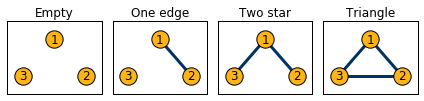

In [4]:
empty=nx.Graph()                        # Empty triad
empty.add_nodes_from([1,2,3])

one_edge=nx.Graph()                     # One edge triad       
one_edge.add_nodes_from(empty)
one_edge.add_edges_from([(1,2)])

two_star=nx.Graph()                     # Two star triad
two_star.add_nodes_from(empty)
two_star.add_edges_from([(1,2),(1,3)])

triangle=nx.Graph()                     # Triangle triad   
triangle.add_nodes_from(empty)
triangle.add_edges_from([(1,2),(1,3),(2,3)])

# Position nodes in the shape of a triangle
node_pos = {1: [1,1], 2: [2,0], 3: [0,0]} 

triad_census_fig = plt.figure(figsize=(6, 1.5))

# Empty triad
ax = triad_census_fig.add_subplot(1,4,1)
nx.draw_networkx(empty, pos=node_pos, with_labels=True, node_color='#FDB515', edge_color='#003262', width=3)
ax.axes.set_xlim([-0.5,2.5])
ax.axes.set_ylim([-0.5,1.5])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('Empty')

# One edge triad
ax = triad_census_fig.add_subplot(1,4,2)
nx.draw_networkx(one_edge, pos=node_pos, with_labels=True, node_color='#FDB515', edge_color='#003262', width=3)
ax.axes.set_xlim([-0.5,2.5])
ax.axes.set_ylim([-0.5,1.5])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('One edge')

# Two star triad
ax = triad_census_fig.add_subplot(1,4,3)
nx.draw_networkx(two_star, pos=node_pos, with_labels=True, node_color='#FDB515', edge_color='#003262', width=3)
ax.axes.set_xlim([-0.5,2.5])
ax.axes.set_ylim([-0.5,1.5])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('Two star')

# Triangle triad
ax = triad_census_fig.add_subplot(1,4,4)
nx.draw_networkx(triangle, pos=node_pos, with_labels=True, node_color='#FDB515', edge_color='#003262', width=3)
ax.axes.set_xlim([-0.5,2.5])
ax.axes.set_ylim([-0.5,1.5])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('Triangle')

# Save result
plt.tight_layout()
plt.savefig(workdir+'Triad_Census.png')  

## Policy implications of transitivity and homophily
The introduction of the paper includes a discussion of the policy implications of a structural taste for transitivity. The following snippet of code reproduces the figure which is used to talk about strategic edge removal in this context. See the paper for narration and explanation.

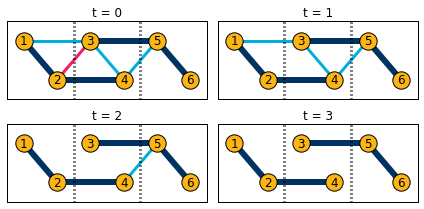

In [5]:
D=nx.Graph(T=0)                                 
D.add_nodes_from([1,2,3,4,5,6])
node_pos = {1: [1,1], 2: [1.5,0.5], 3: [2,1], 4: [2.5,0.5], 5: [3,1], 6: [3.5,0.5]}

# edge targeted for removal by the policy-maker
TE0 = [(2,3)]
TE1 = []
TE2 = []
TE3 = []

# fragile edges which require transitivity and hence disappear after intervention
FE0 = [(1,3),(3,4),(4,5)]
FE1 = [(1,3),(3,4),(4,5)]
FE2 = [(4,5)]
FE3 = []

# strong edges, which form regardless of network structure
SE  = [(1,2),(2,4),(3,5),(5,6)]

target_edge_list  = [TE0, TE1, TE2, TE3]
fragile_edge_list = [FE0, FE1, FE2, FE3]

# Plot sequence of networks after removal of target edge
policy_transitivity_fig = plt.figure(figsize=(6, 3))

for t in [0,1,2,3]:
    ax = 'ax'+str(t)
    ax = policy_transitivity_fig.add_subplot(2,2,t+1)
    
    # Draw network
    nx.draw_networkx(D, pos=node_pos, with_labels=True, node_color='#FDB515', \
                 edgelist=SE, edge_color='#003262', width=6)
    nx.draw_networkx_edges(D, pos=node_pos, edgelist=target_edge_list[t], edge_color='#EE1F60', width=3)
    nx.draw_networkx_edges(D, pos=node_pos, edgelist=fragile_edge_list[t], edge_color='#00B0DA', width=3)
    
    # Draw community boundary lines
    plt.plot((1.75, 1.75), (0.25, 1.75), 'k:', linewidth = 3)
    plt.plot((2.75, 2.75), (0.25, 1.75), 'k:', linewidth = 3)
    
    # Clean up plot and add title
    ax.axes.set_xlim([0.75,3.75])
    ax.axes.set_ylim([0.25,1.25])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title('t = '+str(t))   
    

# Save result
plt.tight_layout()
plt.savefig(workdir+'Transitivity_and_Policy.png')    

## Stable neighborhoods and identification

A key concept in the paper is the notion of a dyad embedded in a _stable neighborhood_. The relative frequency of different link histories for a dyad embedded in such a neighborhood is the source of identification developed in the paper.
<br>
<br>
The paper introduces and discusses several examples of stable neighborhoods. The simpliest example involves a network with just three agents. The next few blocks of code render two sequences of graphs in such a three agent network. In these sequences agents 1 and 2 are embedded in a stable neighborhood as defined in the paper. Variants of these figures first appeared in my 2015 _Annual Review of Economics_ paper "Methods of identification in social networks." The basic idea, however, goes back to my 2013 comment on the Goldsmith-Pinkham and Imbens _Journal of Business and Economic Statistics_ lecture.

#### Sequence used to illustration identification of transitivity:
<br>
The first sequence ilustrates how the researcher can discriminate between transitivity and homophily (heterogeneity). I first generate the triad graphs for periods t=0,1,2,3...

In [6]:
D0=nx.Graph(T=0)                                 # Period 0 graph
D0.add_nodes_from([1,2,3])
D0.add_edges_from([(1,3)])

D1=nx.Graph(T=1)                                 # Period 1 graph
D1.add_nodes_from(D0)
D1.add_edges_from([(1,3),(2,3)])

D2=nx.Graph(T=2)                                 # Period 2 graph
D2.add_nodes_from(D0)
D2.add_edges_from([(1,2),(1,3),(2,3)])

D3=nx.Graph(T=3)                                 # Period 3 graph
D3.add_nodes_from(D0)
D3.add_edges_from([(1,3),(2,3)])

node_pos = {1: [1,1], 2: [2,0], 3: [0,0]}

I then plot the network sequences using the nx.draw_networkx() function. The resulting figure is saved in the working directory as 'Triad_Sequence_1.png'.

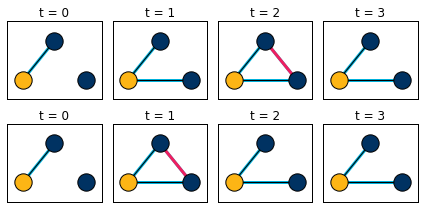

In [7]:
stable_neighborhood_fig = plt.figure(figsize=(6, 3))

# Plot sequence of triad configurations
network_list = [D0, D1, D2, D3]
for t in [0,1,2,3]:
   ax = 'ax'+str(t)
   ax = stable_neighborhood_fig.add_subplot(2,4,t+1)
    
   # Draw network 
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[1,2], node_color='#003262', \
                    edge_color = '#00B0DA', width = 3)
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[3], node_color='#FDB515')
   
   # Re-draw edge between stable dyads in Rose if it is present
   if (1,2) in network_list[t].edges():  
       nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=[(1,2)], edge_color='#EE1F60', width=3)
   
   # Clean up figure
   ax.axes.set_xlim([-0.5,2.5])
   ax.axes.set_ylim([-0.5,1.5])
   ax.axes.get_xaxis().set_visible(False)
   ax.axes.get_yaxis().set_visible(False)
   plt.title('t = '+str(t))

# Plot alternative sequence of triad configurations that satisfies the conditioning event
network_list = [D0, D2, D1, D3]
for t in [0,1,2,3]:
   ax = 'ax'+str(t+4)
   ax = stable_neighborhood_fig.add_subplot(2,4,t+1+4)
   
   # Draw network 
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[1,2], node_color='#003262', \
                    edge_color = '#00B0DA', width = 3)
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[3], node_color='#FDB515')
    
   # Re-draw edge between stable dyads in Rose if it is present
   if (1,2) in network_list[t].edges():  
       nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=[(1,2)], edge_color='#EE1F60', width=3)
    
   # Clean up figure 
   ax.axes.set_xlim([-0.5,2.5])
   ax.axes.set_ylim([-0.5,1.5])
   ax.axes.get_xaxis().set_visible(False)
   ax.axes.get_yaxis().set_visible(False)
   plt.title('t = '+str(t))    

del D0, D1, D2, D3

# Save result
plt.tight_layout()
plt.savefig(workdir+'Triad_Sequence_1.png')

In the above figure the first sequence, depicted on the top row, will be more likely than the second (conditional on observing one sequence or the other) when there exists a structural taste for transitivity. Number agents clockwise from the top. Agents 1 and 2 reap the returns from triadic closure by linking in period $t = 2$, since they share the friend agent 3 in common in period $t = 1$. No such return is generated by linking in period $t = 1$, as they share no friends in common in period $t = 0$.

#### Sequence used to illustration identification of state dependence:
<br>
The second sequence ilustrates how the researcher can discriminate between state dependence and heterogeneity. I first wire the triad graphs for periods t=0,1,2,3.

In [8]:
D0=nx.Graph(T=0)                                 # Period 0 graph
D0.add_nodes_from([1,2,3])
D0.add_edges_from([(1,3),(2,3)])

D1=nx.Graph(T=1)                                 # Period 1 graph
D1.add_nodes_from(D0)
D1.add_edges_from([(1,3),(2,3)])

D2=nx.Graph(T=2)                                 # Period 2 graph
D2.add_nodes_from(D0)
D2.add_edges_from([(1,2),(1,3),(2,3)])

D3=nx.Graph(T=3)                                 # Period 3 graph
D3.add_nodes_from(D0)
D3.add_edges_from([(1,2),(1,3),(2,3)])

node_pos = {1: [1,1], 2: [2,0], 3: [0,0]}

As before I plot the network sequences using the nx.draw_networkx() function. The resulting figure is saved in the working directory as 'Triad_Sequence_2.png'.

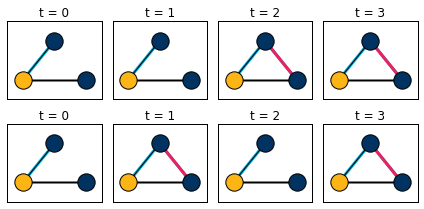

In [9]:
stable_neighborhood_fig = plt.figure(figsize=(6, 3))

# Plot sequence of triad configurations
network_list = [D0, D1, D2, D3]
for t in [0,1,2,3]:
   ax = 'ax'+str(t)
   ax = stable_neighborhood_fig.add_subplot(2,4,t+1)
    
   # Draw network 
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[1,2], node_color='#003262', \
                    edge_color = '#00B0DA', width = 3)
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[3], node_color='#FDB515')
   
   # Re-draw edge between stable dyads in Rose if it is present
   if (1,2) in network_list[t].edges():  
       nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=[(1,2)], edge_color='#EE1F60', width=3)
   
   # Clean up figure
   ax.axes.set_xlim([-0.5,2.5])
   ax.axes.set_ylim([-0.5,1.5]) 
   ax.axes.get_xaxis().set_visible(False)
   ax.axes.get_yaxis().set_visible(False)
   plt.title('t = '+str(t))

# Plot alternative sequence of triad configurations that satisfies the conditioning event
network_list = [D0, D2, D1, D3]
for t in [0,1,2,3]:
   ax = 'ax'+str(t+4)
   ax = stable_neighborhood_fig.add_subplot(2,4,t+1+4)
   
   # Draw network 
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[1,2], node_color='#003262', \
                    edge_color = '#00B0DA', width = 3)
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[3], node_color='#FDB515')
    
   # Re-draw edge between stable dyads in Rose if it is present
   if (1,2) in network_list[t].edges():  
       nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=[(1,2)], edge_color='#EE1F60', width=3)
    
   # Clean up figure
   ax.axes.set_xlim([-0.5,2.5])
   ax.axes.set_ylim([-0.5,1.5])
   ax.axes.get_xaxis().set_visible(False)
   ax.axes.get_yaxis().set_visible(False)
   plt.title('t = '+str(t))     

del D0, D1, D2, D3

# Save result
plt.tight_layout()
plt.savefig(workdir+'Triad_Sequence_2.png')

In the above figure the first sequence, depicted on the top row, will be more likely than the second (conditional on observing one sequence or the other) when there exists a structural state dependence. The reasoning here very much parallels that used in standard binary choice panel data models.

#### A final stable neighborhood example
<br>
The next two blocks of code construct and display a final sequence of rooted networks around a pair agents embedded in a stable neighborhood. This example is meant to illustrate how a stable dyad can be rooted within a relatively complex local network architecture. The resulting figure is saved in the working directory as 'Stable_Neighborhood_Sequence.png'.

In [10]:
D0=nx.Graph(t=0)                                         # Period 0 graph
D0.add_nodes_from([1,2,3,4,5,6,7,8])
D0.add_edges_from([(1,3),(1,4),(1,5),(2,6),(2,7),(2,8),(3,4),(3,5),(4,5)])

D1=nx.Graph(t=1)                                         # Period 1 graph
D1.add_nodes_from(D0)
D1.add_edges_from([(1,3),(1,4),(1,5),(1,6),(2,5),(2,6),(2,7),(2,8),(6,7),(6,8),(7,8)])

D2=nx.Graph(t=2)                                         # Period 2 graph
D2.add_nodes_from(D0)
D2.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,5),(2,6),(2,7),(2,8),(6,7),(6,8),(7,8)])

D3=nx.Graph(t=3)                                         # Period 3 graph
D3.add_nodes_from(D0)
D3.add_edges_from([(1,3),(1,4),(1,5),(1,6),(2,5),(2,6),(2,7),(2,8),(3,4),(3,5),(4,5)])

node_pos=nx.spring_layout(D2)

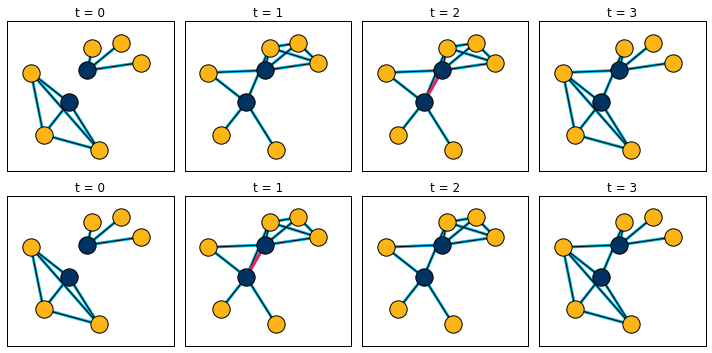

In [11]:
stable_neighborhood_fig = plt.figure(figsize=(10, 5))

# Plot sequence of subgraph configurations
network_list = [D0, D1, D2, D3]
for t in [0,1,2,3]:
   ax = 'ax'+str(t)
   ax = stable_neighborhood_fig.add_subplot(2,4,t+1)
    
   # Plot network sequence 
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[1,2], node_color='#003262', \
                    edge_color = '#00B0DA', width = 3)
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[3,4,5,6,7,8], node_color='#FDB515')
    
   # Re-draw edge between stable dyads in Rose if it is present
   if (1,2) in network_list[t].edges():  
       nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=[(1,2)], edge_color='#EE1F60', width=3)
   
   # Clean up figure
   ax.axes.get_xaxis().set_visible(False)
   ax.axes.get_yaxis().set_visible(False)
   plt.title('t = '+str(t))

# Plot alternative sequence of triad configurations that satisfies the conditioning event    
network_list = [D0, D2, D1, D3]
for t in [0,1,2,3]:
   ax = 'ax'+str(t+4)
   ax = stable_neighborhood_fig.add_subplot(2,4,t+1+4)
   
   # Plot network sequence 
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[1,2], node_color='#003262', \
                    edge_color = '#00B0DA', width = 3)
   nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, nodelist=[3,4,5,6,7,8], node_color='#FDB515')
    
   # Re-draw edge between stable dyads in Rose if it is present
   if (1,2) in network_list[t].edges():  
       nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=[(1,2)], edge_color='#EE1F60', width=3)
   
   # Clean up figure 
   ax.axes.get_xaxis().set_visible(False)
   ax.axes.get_yaxis().set_visible(False)
   plt.title('t = '+str(t))    
 
del D0, D1, D2, D3

# Save result
plt.tight_layout()
plt.savefig(workdir+'Stable_Neighborhood_Sequence.png')

In the figure above, the sequence depicted in the top row is again more likely to be observed than the one in the bottom row when agents have a taste for transitivity. This is becauses agents 1 and 2 share two friends in common in period  $t = 1$ (agents 5 and 6). Hence they generate surplus from engineering triadic closure in period 
$t = 2$. In contrast they share no friends in common in period $t = 0$, and hence generate no utility from triadic closure by linking in period $t = 1$.

## Building the Stable Neighborhood Logit estimator

The FindStableDyads() function accepts a sequence of adjacency matrices for periods t=0,1,2,3 (as well as their 2nd powers) and returns a list of indice pairs corresponding to each stable dyad in the network. The function also returns a pandas dataframe suitable for direct input into a standard logit estimation program.
<br>
<br>
The function SimulateRandomGeometricNetworkSequences() simulates a sequence of random networks as described in the Monte Carlo portion of the paper.

In [12]:
from scipy.spatial.distance import cdist

def SimulateRandomGeometricNetworkSequences(asym_degree, close_link_prob, N, beta, gamma):
    
    # OVERVIEW
    # This function simulates a four period sequence of networks according to the model described
    # in the Monte Carlo section of the paper. The simulator scales well to larger networks by using
    # sparse matrix calculations and only simulating period specific utility shocks for dyads that have
    # a non-zero change of forming a link (i.e., are "close" enough to one another).
    
    # INPUTS:
    # asym_degree     = Asymptotic average degree in period t=0
    # close_link_prob = Period t=0 probability that two agents less than r distance apart link
    #                   NOTE: The two parameters above can be used to calibrate both the density 
    #                         and connectivity of the initial network condition; together they
    #                         determine the radius which defines whether two agents are "close"
    #                         enough to link with non-zero probability
    # N               = Number of agents in the network
    # beta            = State dependence parameter
    # gamma           = Transitivity parameter
   
    # OUTPUTS:
    # D       = four element list consisting of N x N adjacency matrices in periods
    #           t=0,1,2,3; the returned matrices are sparse csc_matrices
    # R       = four element list consisting of the square of N x N adjacency matrix (i.e., friends-of-friends matrix)
    #           in periods t=0,1,2,3; the returned matrices are sparse csc_matrices
    # zeta_xy = N x 2 matrix with node location in x & y coordinate form (used for network visualization)
   
    n       = long(0.5*N*(N-1))                             # Number of dyads in the network
    alpha   = np.log(close_link_prob/(1-close_link_prob))   # Logit index such that exp(alpha)/(1+exp(alpha)) = close_link_prob
    r       = np.sqrt(asym_degree/(math.pi*close_link_prob))# Agents less than r distance apart link with positive probability
    zeta_xy = np.random.uniform(0,np.sqrt(N),(N,2))         # Assign each node to a location in a [0,root-N] x [0,root-N] space
    
    # Compute the Euclidean distance between each pair of nodes
    dist = cdist(zeta_xy, zeta_xy, 'euclidean')
    
    # Find & count all dyads that are within radius r of one another
    # NOTE: We only need to simulate this part of the adjacency matrix, since all other dyads link with probability zero
    dist_r      = np.less_equal(dist,r) # Incidence matrix for event that ij are less than r distance apart
    dist_r      = np.tril(dist_r,-1)    # Lower triangle of incidence matrix
    ij_dist_r   = np.nonzero(dist_r)    # Indices of dyads that are less than r distance apart
    n_ij_dist_r = len(ij_dist_r[1])     # Total number of dyads that are less than r distance apart
     
    # Initialize network adjacency matrices and "friends-in-common" matrices
    D = [sp.csr_matrix((N,N), dtype='int8'), sp.csr_matrix((N,N), dtype='int8'), \
         sp.csr_matrix((N,N), dtype='int8'), sp.csr_matrix((N,N), dtype='int8')]
    R = [sp.csr_matrix((N,N), dtype='int32'), sp.csr_matrix((N,N), dtype='int32'), \
         sp.csr_matrix((N,N), dtype='int32'), sp.csr_matrix((N,N), dtype='int32')]
    
    # Initialize some auxiliary data structures used to speed up computation
    U_t   = np.array((1, n_ij_dist_r), dtype = 'float64')  # Period t utility shifters for neighboring dyads
    D_t   = np.array((1, n_ij_dist_r), dtype = 'int8')     # Period t link outcomes for neighboring dyads
    
    # Simulate network for periods t=0,1,2,3
    for t in [0,1,2,3]:
        
        # Draw period t utility shifters
        U_t = np.random.logistic(0,1,n_ij_dist_r)                 
        
        # Construct period t adjacency matrix        
        if t == 0:
            # Construct initial network condition
            D_t = np.greater(alpha,U_t)
        else:
            # Construct period t=1,2,3 network
            D_t = np.greater(beta*D[t-1][ij_dist_r] + gamma*R[t-1][ij_dist_r] + alpha,U_t)
            
        D[t][ij_dist_r] = D_t                                     
        D[t] = D[t] + D[t].T                                      
        
        # Compute "friends-in-common" matrix using the square of the adjacency matrix 
        R[t] =D[t]**2                                  
 
    return [D,R,zeta_xy]            

def FindStableDyads(D, R):
    
    # OVERVIEW
    # This function searches for dyads embedded in stable neighborhoods and returns and estimation-
    # ready pandas dataframe that can be passed into a vanilla logit estimator. The algorithm is as
    # described in the paper with additional speed-ups using sparse matrix properties and the broadcasting rules of numpy 
    # array operations included here. These features are flagged in the code below.
    
    # INPUTS:
    # D      = four element list consisting of N x N adjacency matrix in periods
    #          t=0,1,2,3,4 (sparse matrices)
    # R      = four element list consisting of square of N x N adjacency matrix in periods (sparse matrices)
    
    # OUTPUTS:
    # sd_df   = pandas dataframe with structure of
    #           {'D2 - D1' : Y, 'beta' : X1, 'gamma' : X2, 'i' : sd_ij[0], 'j' : sd_ij[1]}
    # sd_ij   = list of (i,j) tuples for all stable dyads
    
    #-----------------------------------------------------------#
    # Step 1: Find dyads embedded in stable neighborhoods      -#
    #-----------------------------------------------------------#    
    
    N = D[0].shape[1] # Number of agents in the network
    
    # Find dyads that are *never* or *always* linked in t=1,2,3
    # NOTE: Searching for the opposite of the needed criterion is fastest since D[t] is sparse and S will generally be
    #       "dense"
    S      = np.ones((N,N), dtype='int8') - (D[1] + D[2] + D[3] == 1)*1 - (D[1] + D[2] + D[3] == 2)*1
    S_i    = np.sum(S,axis = 0) # Row sums of S
     
    # Find dyads who *change* link status between periods t=1 and t=2
    Changers  = (D[1]+D[2]==1)*1            # Dyads that changed link status over t=1 and t=2
    T_i       = (np.asarray(S_i==(N-1)))*1  # Agents with stable link structures in t=1,2,3 *except*
                                            # with exactly one other agent where one or two switches occur
                                            # NOTE: return asarray() to exploit numpy speed-ups
    
    # Find dyads who *both* change their link status over t=1,2 & do not
    # add or delete any links with any other agents over t=1,2,3
    # NOTE: This is the first stable dyad condition 
    StableDyadCond_1 = Changers.multiply(T_i * T_i.T)  # This line is exploiting numpy broadcasting rules inside the ()
    del S, S_i, T_i                                    # NOTE: A.multiply(B) implements element-wise multiplication for sparse
                                                       # matrices
    
    ij = StableDyadCond_1.nonzero()                    # Indices of dyads meeting first stable dyad condition
    i  = ij[0]
    j  = ij[1]
    
    # Find agents who did not add or delete any links in t=1,2
    V   = np.ones((N,N), dtype='int8') - Changers.todense()  
    V_i = (np.asarray(V.sum(axis = 0) == N))*1         # 1 x N numpy array indicating which agents *neither* added
                                                       # nor deleted *any* links in t=1,2 
    
    # Combine elements to construct stable neighborhood indicator matrix
    F      = np.ones((len(i),N))
    W      = sp.csc_matrix((N,N), dtype='int8')
    W[i,:] = D[1][i,:].multiply(V_i)   + (F - D[1][i,:])   # This line and the next exploit numpy broadcasting rules
    W[:,j] = D[1][:,j].multiply(V_i.T) + (F.T - D[1][:,j]) # in the first multiplication part of the expression
    W[i,j] = 0
    del ij, i, j, V, V_i, Changers, F
    
    SW  = np.asarray((StableDyadCond_1 + W).todense())
    Z_i = np.prod(SW, axis = 0).reshape(N,1)
    Z_j = np.prod(SW, axis = 1).reshape(N,1)
    
    StableDyad = StableDyadCond_1.multiply(Z_i.dot(Z_j.T))  # N x N stable dyad incidence matrix
    del StableDyadCond_1, W, SW, Z_i, Z_j
    
    StableDyad = sp.tril(StableDyad,-1)  # n x 1 binary vector indicating which dyads are in stable neighborhoods   
    sd_ij = StableDyad.nonzero()         # agent indices for stable dyads
    
    #-----------------------------------------------------------#
    # Step 2: Organize data for estimation                     -#
    #-----------------------------------------------------------#
    
    Y  = D[2][sd_ij] - D[1][sd_ij]
    X1 = D[3][sd_ij] - D[0][sd_ij]
    X2 = R[1][sd_ij] - R[0][sd_ij]     

    Y  = np.ravel(Y)                   # Pandas only accepts one dimensional arrays as data inputs, hence ravel
    X1 = np.ravel(X1)
    X2 = np.ravel(X2)
    
    # Create pandas dataframe with estimation-ready data
    sd_df = pd.DataFrame({'D2 - D1' : Y, 'beta' : X1, 'gamma' : X2, 'i' : sd_ij[0], 'j' : sd_ij[1]})
   
    return [sd_df, sd_ij]

## Monte Carlo experiments and code evaluation

The next several blocks of code simulate a large number of network sequences, search for dyads embedded in stable neighborhoods within each simuated sequence, and then fit the link formation model introduced in the paper using the stable neighborhoods (SN) logit estimator (also introduced in the paper). 
<br>
<br>
The Monte Carlo design uses a random geometric graph to define an "opportunity graph" for link formation. The book by Matthew Penrose, _Random Geometric Graphs_ provides a nice introduction to random geometric graphs. 
<br>
<br>
In the designs nodes are scattered uniformly in a 

$$[0,\sqrt{N}] \times [0,\sqrt{N}]$$ 

plane. The values of $A_{ij}$ are calibrated such that, in the initial $t = 0$ period, nodes link with zero probability if the distance between them is greater that $r$. While an edge between two nodes forms in period $t = 0$ with probability $0.75$ if the distance between them is less than $r$. The network evolves in subsequent periods $t=1,2,3$ according to the internal logic of the model with $\beta=\gamma=1$. Note that links never form between agents more than $r$ apart (i.e., $A_{ij}$ is infinitely negative for such agents).
<br>
<br>
The simulated networks are sparse, in the sense that average degree is not increasing in network size. Depending on the magnitude of $r$, the network in each period will consist of many disconnected components or most nodes will belong to a single large giant component. The designs are calibated such that average degree in the initial network condition will be 2, 3 or 4. When average degree is 2 the network sequences consist of many disconnected components. When average degree is 3 a large component forms, but many small disconnected components remain. When average degree is 4 almost all nodes belong to a single giant component.

#### Performance of FindStableDyads() function

Before running the simulation experiments I first evaluate the performance of the FindStableDyads() function on the  network sequences simulated in the Monte Carlo experiments. The algorithmn performs reasonably well with CPU time increasing roughly linear in the number of dyads in the network.

10 loops, best of 3: 36.4 ms per loop
10 loops, best of 3: 33 ms per loop
10 loops, best of 3: 112 ms per loop
10 loops, best of 3: 96.6 ms per loop
1 loops, best of 3: 417 ms per loop
1 loops, best of 3: 357 ms per loop
1 loops, best of 3: 1.56 s per loop
1 loops, best of 3: 1.58 s per loop
1 loops, best of 3: 7.39 s per loop
1 loops, best of 3: 7.49 s per loop
1 loops, best of 3: 34.1 s per loop
1 loops, best of 3: 31.8 s per loop
10 loops, best of 3: 31.6 ms per loop
10 loops, best of 3: 30.2 ms per loop
10 loops, best of 3: 102 ms per loop
10 loops, best of 3: 89.1 ms per loop
1 loops, best of 3: 337 ms per loop
1 loops, best of 3: 366 ms per loop
1 loops, best of 3: 1.34 s per loop
1 loops, best of 3: 1.3 s per loop
1 loops, best of 3: 6.67 s per loop
1 loops, best of 3: 6.68 s per loop
1 loops, best of 3: 33 s per loop
1 loops, best of 3: 32.5 s per loop
10 loops, best of 3: 37.3 ms per loop
10 loops, best of 3: 32.7 ms per loop
10 loops, best of 3: 98.6 ms per loop
10 loops, bes

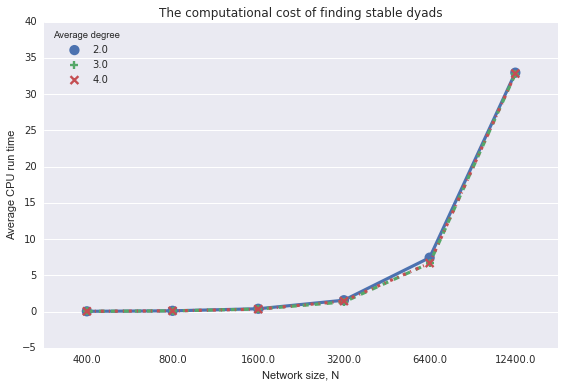

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt

AsymDegreeList  = [2,3,4] # Average degree of initial network condition
close_link_prob = 0.75    # Period t=0 link probability for dyads that are "close"
beta            = 1       # State dependence parameter
gamma           = 1       # Transitivity parameter


run_time_sample_sizes = [400, 800, 1600, 3200, 6400, 12400]
num_iter = 2
run_times = list()
result = list()

# Initialize pandas dataframe to store CPU time results in
run_time_df = pd.DataFrame(columns=['N','Average degree','CPU run time'])
  
# To measure how the performance of the FindStableDyads() function scales with network size I average its performance
# across num_iter simulated network sequences. For each simulated sequence I uses the %timeit function, saving the best
# of three CPU time measures as the result.
for asym_degree in AsymDegreeList:
    
    for N in run_time_sample_sizes:
        
        for b in xrange(num_iter):
        
            # Simulate random network sequence
            [D, R, zeta_xy] = SimulateRandomGeometricNetworkSequences(asym_degree, close_link_prob, N, beta, gamma)
        
            # Find stable dyads
            timit_results = %timeit -o -c FindStableDyads(D, R) 
            result.append(timit_results.best)
            
        run_times.append(np.mean(result))
        result = list()
    
    t = pd.DataFrame({'N' : run_time_sample_sizes,'Average degree' : asym_degree ,'CPU run time' : run_times})
    run_time_df = run_time_df.append(t)
    run_times = list()
        

print run_time_df

# Plot CPU run time as a function of network size
sns.set_style("darkgrid")
sns.pointplot(x="N", y="CPU run time", hue="Average degree", \
              data=run_time_df, \
              markers=["o","+","x"], \
              linestyles=["-","--","-."])


plt.title('The computational cost of finding stable dyads')
plt.xlabel('Network size, N')
plt.ylabel('Average CPU run time')

# Save result
plt.tight_layout()
plt.savefig(workdir+'FindStableDyads_CPU_RunTime.png')

#### Run Monte Carlo experiments

For each simulated graph I measure average degree, network density, the transitivity index and the fraction of nodes in the largest connected component.
<br>
<br>
I fit the SN logit estimator to each simulated graph. I evaluate the bias, sampling variability and coverage properties of the SN logit estimator and its associated Wald-type asymptotic confidence intervals.

In [24]:
N     = 5000                                       # Number of agents in the network
n     = 0.5*N*(N-1)                                # Number of dyads in the network
B     = 1000                                       # Number of Monte Carlo replications
np.random.seed(seed=361)                           # Set random seed

# Objects needed to efficiently implement the "naive" logit estimator
ComputeNaive = False                                 # Set to True it computing naive Logit estimates as well
ij_lt   = np.tril_indices(N, k=-1)                   # Indices for the lower triangle of an N x N matrix   
dyad_id = np.concatenate((np.arange(0,n,dtype=int),\
                          np.arange(0,n,dtype=int),\
                          np.arange(0,n,dtype=int))) # Create a dyad cluster indicator for naive logit standard error computation

# Definition of network generating process
AsymDegreeList  = [2,3,4]
close_link_prob = 0.75    # Period t=0 link probability for dyads that are "close"
beta            = 1       # State dependence parameter
gamma           = 1  

Network_Properties = [np.zeros((B,20)), np.zeros((B,20)), np.zeros((B,20))]         # Data structures to store network properties and estimation
Simulation_Results = [np.zeros((B,15)), np.zeros((B,15)), np.zeros((B,15))]         # MC results for each simulated network sequence
ExpectedDegree     = [0,0,0]



for m in [0,1,2]:
    
    r      = np.sqrt(AsymDegreeList[m]/(math.pi*close_link_prob))  # Set asymptotic average degree for D[0]

    # Calculate the expected average degree at t=0 using the exact distance distribution
    # (see the Appendix to the paper for relevant calculations)
    ExpectedDegree[m]   = ((N-1)/N)*(math.pi*np.square(r) - (8/3)*np.power(r, 3)/np.sqrt(N) \
                                  + (1/2)*np.power(r, 4)/N)*close_link_prob
    
    # Average degree as the number of nodes approaches infinity (should equal AsymDegreeList[j])
    AsymptoticDegree = (math.pi*np.square(r))*close_link_prob

    CalculateNetworkProperties = True  # If True calculate network statistics across Monte Carlo draws

    # Simulate B network sequences

    for b in range(0,B):
        start = time.time()
        
        #-----------------------------------------------------------#
        # Step 1 : Simulate a network sequence using to current DGP-# 
        #-----------------------------------------------------------#
        
        [D, R, zeta_xy] = SimulateRandomGeometricNetworkSequences(AsymDegreeList[m], close_link_prob, N, beta, gamma)
        
        #-----------------------------------------------------------#
        # Step 2 : Calculate basic network statistics              -#
        #-----------------------------------------------------------#
        
        if CalculateNetworkProperties:
            for t in [0,1,2,3]:
            
                # Compute network/graph summary statistics
                G = nx.Graph(D[t])
                deg_seq = nx.degree(G).values()
                Network_Properties[m][b,0+t*5] = nx.density(G)                                      # Density           
                Network_Properties[m][b,1+t*5] = nx.transitivity(G)                                 # Transitivity
                Network_Properties[m][b,2+t*5] = np.mean(deg_seq)                                   # Mean Degree
                Network_Properties[m][b,3+t*5] = np.std(deg_seq)                                    # Std. of Degree
                Network_Properties[m][b,4+t*5] = len(max(nx.connected_components(G), key=len))/N    # Giant component
            
                del G
                
        #-----------------------------------------------------------#
        # Step 3 : Organize data for estimation                    -#
        #-----------------------------------------------------------#
        
        [df, sd_ij] = FindStableDyads(D, R)
        
        # Count number of stable pairs
        Simulation_Results[m][b,0] =  np.shape(sd_ij)[1]
    
        #-----------------------------------------------------------#
        # Step 4: Compute SN logistic regression                   -#
        #-----------------------------------------------------------#
    
        try:
            logit = sm.Logit((df['D2 - D1']==1), df[['beta','gamma']]). \
                             fit(start_params = [beta, gamma], method = 'newton', maxiter = 1000, disp = False)
            Simulation_Results[m][b,1] = logit.mle_retvals['converged'] # Record whether logit converged
            Simulation_Results[m][b,2] = logit.params['beta']           # Record parameter estimates 
            Simulation_Results[m][b,3] = logit.params['gamma']
            Simulation_Results[m][b,4] = logit.bse['beta']              # Record standard error estimates 
            Simulation_Results[m][b,5] = logit.bse['gamma']
            
            # Check coverage of 95 percent Wald asymptotic confidence interval
            ci = logit.conf_int()
            ci['theta'] = [beta, gamma]
            ci.columns = ['lower', 'upper', 'theta']
            ci['covered'] = (ci['lower']<=ci['theta']) & (ci['upper']>=ci['theta'])
            Simulation_Results[m][b,6] = ci['covered'][0]
            Simulation_Results[m][b,7] = ci['covered'][1]
        
        except:        
            Simulation_Results[m][b,1] = False
            
        #-----------------------------------------------------------#
        # Step 5: Compute naive dynamic logistic regression        -#
        #-----------------------------------------------------------#
        
        # Only compute in ComputeNaive = True
        if ComputeNaive:
        
            # Create Pandas dataframe for naive logit estimation
            Dt      = np.concatenate((D[3][ij_lt],D[2][ij_lt],D[1][ij_lt]), axis=1)
            Dlag    = np.concatenate((D[2][ij_lt],D[1][ij_lt],D[0][ij_lt]), axis=1)
            Rlag    = np.concatenate((R[2][ij_lt],R[1][ij_lt],R[0][ij_lt]), axis=1)
        
            # Pandas only accepts one dimensional arrays as data inputs, hence ravel
            Dt   = np.ravel(Dt)                   
            Dlag = np.ravel(Dlag)
            Rlag = np.ravel(Rlag)
    
            # Create pandas dataframe with estimation-ready data
            nl_df = pd.DataFrame({'D_t' : Dt, 'beta' : Dlag, 'gamma' : Rlag, 'dyad_id' : dyad_id})
        
            # Fit naive logit model (with standard errors "clustered" at the dyad level)
            try:
                naive_logit = sm.Logit(nl_df['D_t'], sm.add_constant(nl_df[['beta','gamma']])). \
                                 fit(start_params = [0, beta, gamma], method='bfgs',maxiter = 1000, disp = False, \
                                     cov_type='cluster', cov_kwds={'groups': nl_df['dyad_id']})
                Simulation_Results[m][b,8]  = naive_logit.mle_retvals['converged']           # Record whether logit converged
                Simulation_Results[m][b,9]  = naive_logit.params['beta']                     # Record parameter estimates 
                Simulation_Results[m][b,10] = naive_logit.params['gamma']
                Simulation_Results[m][b,11] = naive_logit.bse['beta']                        # Record standard error estimates 
                Simulation_Results[m][b,12] = naive_logit.bse['gamma']
            
                # Check coverage of 95 percent Wald asymptotic confidence interval
                ci = naive_logit.conf_int()
                ci = ci.ix[1:]                 # Delete confidence interval corresponding to constant
                ci['theta'] = [beta, gamma]
                ci.columns = ['lower', 'upper', 'theta']
                ci['covered'] = (ci['lower']<=ci['theta']) & (ci['upper']>=ci['theta'])
                Simulation_Results[m][b,13] = ci['covered'][0]
                Simulation_Results[m][b,14] = ci['covered'][1]
           
            except:        
                Simulation_Results[m][b,8] = False
            
        end = time.time()
        if (b+1) % 10 == 0:
            print "AsymDeg = "+ str(AsymDegreeList[m])+", Time required f/ MC rep  " + str(b+1) + " of " + str(B) + ": " + str(end-start)   

AsymDeg = 2, Time required f/ MC rep  10 of 1000: 6.2020919323
AsymDeg = 2, Time required f/ MC rep  20 of 1000: 8.89056301117
AsymDeg = 2, Time required f/ MC rep  30 of 1000: 7.39700603485
AsymDeg = 2, Time required f/ MC rep  40 of 1000: 6.26213788986
AsymDeg = 2, Time required f/ MC rep  50 of 1000: 6.14102602005
AsymDeg = 2, Time required f/ MC rep  60 of 1000: 5.96947288513
AsymDeg = 2, Time required f/ MC rep  70 of 1000: 6.10220384598
AsymDeg = 2, Time required f/ MC rep  80 of 1000: 6.19154191017
AsymDeg = 2, Time required f/ MC rep  90 of 1000: 6.23175001144
AsymDeg = 2, Time required f/ MC rep  100 of 1000: 6.01999783516
AsymDeg = 2, Time required f/ MC rep  110 of 1000: 6.72487807274
AsymDeg = 2, Time required f/ MC rep  120 of 1000: 6.09845399857
AsymDeg = 2, Time required f/ MC rep  130 of 1000: 6.20748186111
AsymDeg = 2, Time required f/ MC rep  140 of 1000: 6.20574498177
AsymDeg = 2, Time required f/ MC rep  150 of 1000: 6.1869571209
AsymDeg = 2, Time required f/ MC rep

The next two blocks of code produce summaries of the results of the different Monte Carlo experiment. I begin by printing the expected average degree in the network in period $t = 0$ (this differs from the asymptotic approximation due to a boundary bias correction). I also calculate the average number of dyads embedded in stable neighborhoods across all Monte Carlo replications (as well as the number of times the SN logit estimator successfully converged). This is followed by some basic network summary statistics.

In [25]:
for m in [0,1,2]:
    
    print "-----------------------------------------------------------------------"
    print "- NETWORK PROPERTIES, ASYMPTOTIC AVERAGE DEGREE IN INITIAL PERIOD = "+ str(AsymDegreeList[m]) + " -"
    print "-----------------------------------------------------------------------"
    
    print ""
    print "Expected Degree in t=0 (w/ boundary bias correction)"
    print ExpectedDegree[m]
    
    print ""
    print "Average number of stable neighborhoods"
    print np.mean(Simulation_Results[m][:,0], axis = 0) 

    print ""
    print "Number of times SN logit successfully converged"
    print np.sum(Simulation_Results[m][:,1], axis = 0) 

    print ""
    print "Number of times `naive' logit successfully converged"
    print np.sum(Simulation_Results[m][:,8], axis = 0) 
    
    # Find simulation replicates where convergence was successful
    b = np.where(Simulation_Results[m][:,1])[0]
    NetProp = Network_Properties[m][b,:]

    # Summary statistics for simulated network sequences
    network_summary = np.mean(NetProp, axis=0)
    network_summary = np.reshape(network_summary,(4,5))

    print ""
    print "Average network density and transitivity for t = 0,1,2,3"
    print network_summary[:,0:2]

    print ""
    print "Average degree and degree std for t = 0,1,2,3"
    print network_summary[:,2:4]

    print ""
    print "Average fraction of nodes in largest connected component for t = 0,1,2,3"
    print network_summary[:,4]
    print ""
    print ""

-----------------------------------------------------------------------
- NETWORK PROPERTIES, ASYMPTOTIC AVERAGE DEGREE IN INITIAL PERIOD = 2 -
-----------------------------------------------------------------------

Expected Degree in t=0 (w/ boundary bias correction)
1.97753905407

Average number of stable neighborhoods
237.505

Number of times SN logit successfully converged
1000.0

Number of times `naive' logit successfully converged
0.0

Average network density and transitivity for t = 0,1,2,3
[[  3.95774435e-04   4.41798745e-01]
 [  4.81987437e-04   5.75373946e-01]
 [  4.97785157e-04   5.93242628e-01]
 [  5.00306301e-04   5.95204352e-01]]

Average degree and degree std for t = 0,1,2,3
[[ 1.9784764   1.41274725]
 [ 2.4094552   1.6313795 ]
 [ 2.488428    1.66202389]
 [ 2.5010312   1.66458209]]

Average fraction of nodes in largest connected component for t = 0,1,2,3
[ 0.0102702  0.0124512  0.012903   0.0129286]


---------------------------------------------------------------------

The next block of code produces summaries the performance of the SN logit estimator and is associated inference procedures across the different Monte Carlo designs.

In [26]:
for m in [0,1,2]:
    
    print "------------------------------------------------------------------------"
    print "- RESULTS FOR STABLE NEIGHBORHOOD LOGIT ESTIMATOR                      -"
    print "------------------------------------------------------------------------"
    
    print "------------------------------------------------------------------------"
    print "- MONTE CARLO RESULTS, ASYMPTOTIC AVERAGE DEGREE IN INITIAL PERIOD = "+ str(AsymDegreeList[m]) + " -"
    print "------------------------------------------------------------------------"
    
    # Find simulation replicates where convergence was successful
    b = np.where(Simulation_Results[m][:,1])[0]
    SimRes = Simulation_Results[m][b,:]

    # Create Pandas dataframe with SN logit Monte Carlo results
    SR=pd.DataFrame({'Stable Dyad' : SimRes[:,0], 'beta_SN' : SimRes[:,2],\
                     'gamma_SN' : SimRes[:,3], 'beta_se' : SimRes[:,4],\
                     'gamma_se' : SimRes[:,5], 'beta_coverage' :  SimRes[:,6],\
                     'gamma_coverage' :  SimRes[:,7]})

    print ""
    print "Monte Carlo summary statistics for SN logit"
    print SR.describe()

    Q = SR[['beta_SN','gamma_SN']].quantile(q=[0.05,0.95])
    print ""
    print 'Robust estimate of standard deviation of beta_SN'
    print (Q['beta_SN'][0.95]-Q['beta_SN'][0.05])/(2*1.645)
    print 'Robust estimate of standard deviation of gamma_SN'
    print (Q['gamma_SN'][0.95]-Q['gamma_SN'][0.05])/(2*1.645)
    
    print "------------------------------------------------------------------------"
    print "- RESULTS FOR NAIVE LOGIT ESTIMATOR                                    -"
    print "------------------------------------------------------------------------"
    
    print "------------------------------------------------------------------------"
    print "- MONTE CARLO RESULTS, ASYMPTOTIC AVERAGE DEGREE IN INITIAL PERIOD = "+ str(AsymDegreeList[m]) + " -"
    print "------------------------------------------------------------------------"
    
    # Find simulation replicates where convergence was successful
    b = np.where(Simulation_Results[m][:,8])[0]
    SimRes = Simulation_Results[m][b,:]

    # Create Pandas dataframe with SN logit Monte Carlo results
    SR=pd.DataFrame({'beta_NL'  : SimRes[:,9],\
                     'gamma_NL' : SimRes[:,10], 'beta_se' : SimRes[:,11],\
                     'gamma_se' : SimRes[:,12], 'beta_coverage' :  SimRes[:,13],\
                     'gamma_coverage' :  SimRes[:,14]})

    print ""
    print "Monte Carlo summary statistics for `naive' logit"
    print SR.describe()

    Q = SR[['beta_NL','gamma_NL']].quantile(q=[0.05,0.95])
    print ""
    print 'Robust estimate of standard deviation of beta_NL'
    print (Q['beta_NL'][0.95]-Q['beta_NL'][0.05])/(2*1.645)
    print 'Robust estimate of standard deviation of gamma_NL'
    print (Q['gamma_NL'][0.95]-Q['gamma_NL'][0.05])/(2*1.645)



------------------------------------------------------------------------
- RESULTS FOR STABLE NEIGHBORHOOD LOGIT ESTIMATOR                      -
------------------------------------------------------------------------
------------------------------------------------------------------------
- MONTE CARLO RESULTS, ASYMPTOTIC AVERAGE DEGREE IN INITIAL PERIOD = 2 -
------------------------------------------------------------------------

Monte Carlo summary statistics for SN logit
       Stable Dyad      beta_SN  beta_coverage      beta_se     gamma_SN  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean    237.505000     1.013819       0.960000     0.259324     1.045832   
std      14.351514     0.266121       0.196057     0.022340     0.288888   
min     196.000000     0.084825       0.000000     0.215920     0.201364   
25%     228.000000     0.827869       1.000000     0.243346     0.848450   
50%     237.000000     1.001824       1.000000     0.255821  

In general, the more disconnected the graph, the larger the number of dyads embedded in stable neighborhoods (holding overall network size fixed). However even for graphs with most nodes belonging to one giant component, there are generally a sufficient number of dyads in stable neighborhoods to permit estimation if the network is sufficiently large.

# Visualizing identification in a large sparse graph

The next block of code plots a sequence of simulated networks. The network generating process is the same as that used in the Monte Carlo experiments. Nodes are located in a $[0,\sqrt{N}] \times [0,\sqrt{N}]$ plane according to their draws of $\zeta_{x}$ and $\zeta_{y}.$ The $ A_{ij} $ distribution is calibrated as described above and  $\beta=\gamma=1$ as before. I set $N = 200$ to make the graph more readable.
<br>
<br>
Blue nodes correspond to agents embedded in stable neighborhoods and dark orange edges to links between such agents. Gold nodes correspond to agents that were a path-length 1 from stable nodes at least once during periods t = 1,2,3. Darker yellow nodes to those agents that were a path-length 2 from a stable node in periods t=1,2. Green edges correspond to links between agents in a stable dyads' neighborhoods except those links between the two agents in the dyad itself. Dark green edges correspond to links between direct neighbors of the stable dyad, and light green to those among indirect neighbors. All other nodes and edges are depicted grey. 

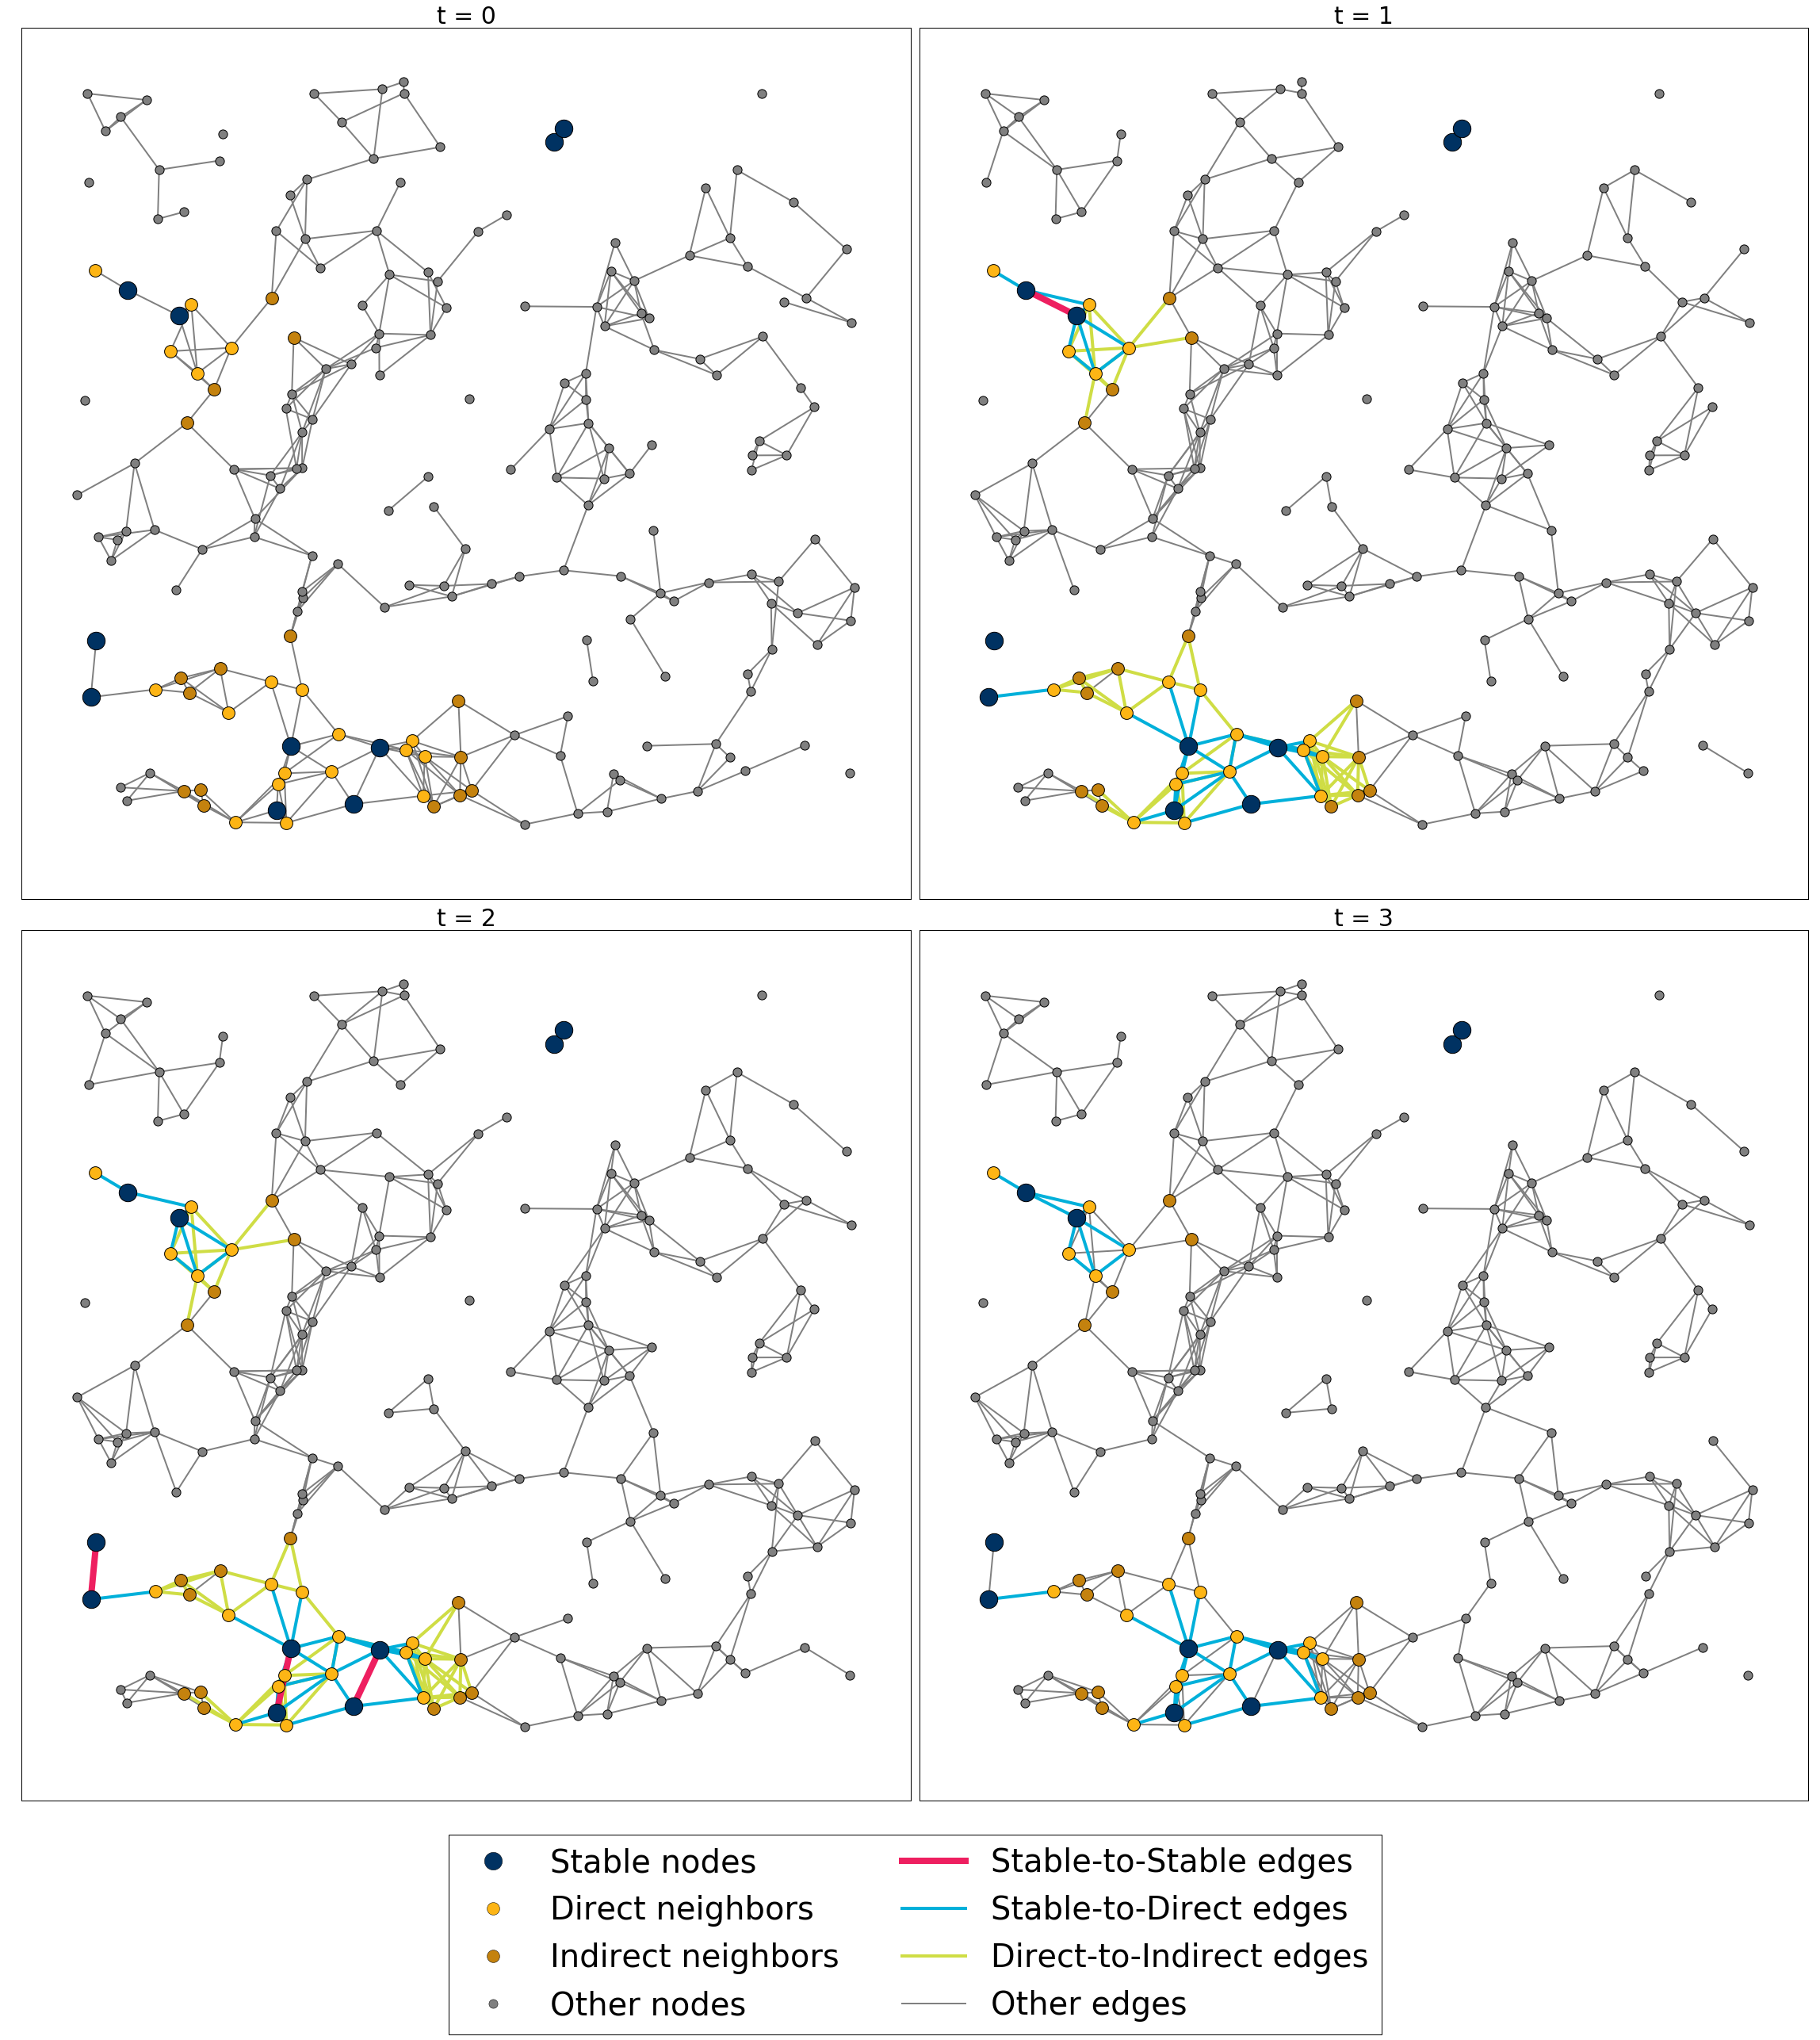

In [27]:
# Define network generating process
asym_degree     = 4
close_link_prob = 0.75
N               = 200
beta            = 1
gamma           = 1

# Simulate random network sequence
[D, R, zeta_xy] = SimulateRandomGeometricNetworkSequences(asym_degree, close_link_prob, N, beta, gamma)

# Find stable dyads
[df, sd_ij] = FindStableDyads(D, R)

# Construct NetworkX graph objects for t=0,1,2,3
G0 = nx.Graph(D[0])
G1 = nx.Graph(D[1])
G2 = nx.Graph(D[2])
G3 = nx.Graph(D[3])
network_list = [G0, G1, G2, G3]

# Find nodes embedded in stable neighborhods
stable_nodes   = list(set(sd_ij[0]) | set(sd_ij[1]))

# Find neighborhood of stable dyads
# Step 1: First find all nodes to which a stable node was _directly_ linked to in periods t=1,2,3
node_set = set()
for t in [1,2,3]:
    for i in stable_nodes:
        G_i = nx.ego_graph(network_list[t], i, radius=1, center=False, undirected=True)
        node_set.update(G_i.nodes())

# List of nodes of path distance 1 to stable nodes in t=1,2,3 (but excluding stable nodes)
direct_neighbor_nodes = list(set(node_set) - set(stable_nodes))         
        
# Step 2: Second find all nodes to which a stable node was _indirectly_ linked to in periods t=1,2
node_set = set()
for t in [1,2]:
    for i in direct_neighbor_nodes:
        G_i = nx.ego_graph(network_list[t], i, radius=1, center=False, undirected=True)
        node_set.update(G_i.nodes())
        
# List of nodes of path distance 2 to stable nodes in t=1,2,3
indirect_neighbor_nodes = list(set(node_set) - set(direct_neighbor_nodes) - set(stable_nodes))           

# Define additional subsets of nodes
# All nodes path distance 1 or 2 to stable node
indirect_and_direct_neighbor_nodes = indirect_neighbor_nodes+direct_neighbor_nodes
    
# All nodes path distance 0 or 1 to stable node
direct_neighbor_and_stable_nodes = direct_neighbor_nodes+stable_nodes       

# All nodes path distance greater than 2 from a stable node
other_nodes = set(range(0, N)) - set(indirect_neighbor_nodes) - set(direct_neighbor_nodes) - set(stable_nodes)

# Create a dictionary with node positions as defined by zeta_x and zeta_y location draws
node_pos = {}
for i in range(N):
    node_pos[i] = [np.asscalar(zeta_xy[i,0]), np.asscalar(zeta_xy[i,1])]

# Plot network t=0,1,2,3
fig_net_seq_1 = plt.figure(figsize=(32, 32))

#----------------------------------------------------------#
#- Create common custom legend for all four subplots      -# 
#----------------------------------------------------------#

import matplotlib.lines as mlines

# Legend items for node types
stable_patch   = mlines.Line2D([], [], color='#003262', marker='o', linestyle='None',\
                               markersize=np.sqrt(500), label='Stable nodes')
direct_patch   = mlines.Line2D([], [], color='#FDB515', marker='o', linestyle='None',\
                               markersize=np.sqrt(250), label='Direct neighbors')
indirect_patch = mlines.Line2D([], [], color='#C4820E', marker='o', linestyle='None',\
                               markersize=np.sqrt(250), label='Indirect neighbors')
other_patch    = mlines.Line2D([], [], color='grey', marker='o', linestyle='None',\
                               markersize=np.sqrt(125), label='Other nodes')

# Legend items for edge types
stable_to_stable_patch    = mlines.Line2D([], [], color='#EE1F60', marker='None', linestyle='-',\
                                          label='Stable-to-Stable edges', linewidth=8)
stable_to_direct_patch    = mlines.Line2D([], [], color='#00B0DA', marker='None', linestyle='-',\
                                          label='Stable-to-Direct edges', linewidth=4)
direct_to_indirect_patch  = mlines.Line2D([], [], color='#CFDD45', marker='None', linestyle='-',\
                                          label='Direct-to-Indirect edges', linewidth=4)
other_edges_patch         = mlines.Line2D([], [], color='grey', marker='None', linestyle='-',\
                                          label='Other edges', linewidth=2)

lgd = plt.legend(handles=[stable_patch, direct_patch, indirect_patch, other_patch, \
                          stable_to_stable_patch, stable_to_direct_patch, direct_to_indirect_patch, other_edges_patch], \
                          bbox_to_anchor=(0.5, -0.01), loc='upper center', fontsize=40, ncol=2, numpoints = 1) 

plt.axis('off') # Make sure over plot does not have tick marks

# NOTE: Let the node_size = y argument in nx.draw_networkx(), then setting markersize = np.sqrt(y)
#       in the code above appears to generate objects of the same size
# NOTE: Color palettes from http://www.berkeley.edu/brand/img/colors/WebColor_accessible_AA_swatches.pdf

#----------------------------------------------------------#
#- End of custom plot code                                -#
#----------------------------------------------------------#

for t in [0,1,2,3]:
    
    # Construct subgraphs for different combinations of nodes
    St   = network_list[t].subgraph(stable_nodes)              
    Di   = network_list[t].subgraph(direct_neighbor_nodes)
    In   = network_list[t].subgraph(indirect_neighbor_nodes) 
    DiSt = network_list[t].subgraph(direct_neighbor_and_stable_nodes)   
    InDi = network_list[t].subgraph(indirect_and_direct_neighbor_nodes)   
    
    # Plot network in period t
    ax = 'ax'+str(t)
    ax = fig_net_seq_1.add_subplot(2,2,1+t)
    
    # Draw entire period t network
    nx.draw_networkx(network_list[t], pos=node_pos, with_labels=False, \
                     node_color='grey', node_size=125, edge_color='grey', width=2)
    # Re-draw indirect neighbor nodes (Web Medalist)
    nx.draw_networkx_nodes(network_list[t], pos=node_pos, with_labels=False, nodelist=indirect_neighbor_nodes, \
                           node_color='#C4820E', node_size=250)
    # Re-draw direct neighbor nodes (California Gold)
    nx.draw_networkx_nodes(network_list[t], pos=node_pos, with_labels=False, nodelist=direct_neighbor_nodes, \
                           node_color='#FDB515', node_size=250)
    # Re-draw stable nodes (Berkeley Blue)
    nx.draw_networkx_nodes(network_list[t], pos=node_pos, with_labels=False, nodelist=stable_nodes, \
                           node_color='#003262', node_size=500)
    
    # Re-draw edges between indirect and direct neighbor nodes in periods t = 1,2
    # Edge Color = Ion
    if t in {1,2}:
        # Remove indirect-to-indirect links (second neighborhood stability requirement) 
        radius_2_edges = set(InDi.edges()) - set(In.edges())
        nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=radius_2_edges, edge_color='#CFDD45', width=4)

    # Re-draw edges between stable and direct neighbor nodes in periods t = 1,2,3
    # Edge Color = Lawrence
    if t in {1,2,3}:
        # Remove stable-to-stable and direct-to-direct links (first neighborhood stability requirement)
        # ()
        radius_1_edges = set(DiSt.edges()) - set(Di.edges()) - set(St.edges())
        nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=radius_1_edges, edge_color='#00B0DA', width=4)
        
    # Re-draw edges between stable nodes in periods t = 1,2 
    # Edge Color = Rose Garden
    if t in {1,2}:
        nx.draw_networkx_edges(network_list[t], pos=node_pos, edgelist=St.edges(), edge_color='#EE1F60', width=8)
    
    ax.axes.set_xlim([-1,np.sqrt(N)+1])
    ax.axes.set_ylim([-1,np.sqrt(N)+1])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title('t = '+str(t), fontsize=30)
    del St, Di, In, DiSt, InDi
    
# Save figure
plt.tight_layout()
#plt.savefig(workdir+'Simulated_Network_Sequence.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [28]:
# This imports an attractive notebook style from Github
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())